In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Question 1

In [9]:
path = "data/hepatitis.csv"

df = pd.read_csv(path) # read the CSV file

df = df.dropna(axis=1, thresh=len(df)*0.1) # drop columns
df = df.dropna(axis=1, thresh=len(df)*0.1) # drop rows

df['sex'] = df['sex'].apply(lambda x: 1 if x == "male" else 0) # dummy variables, binning
df['class'] = df['class'].apply(lambda x: 1 if x == "live" else 0) 

df = df.fillna(df.mean()) # fill missing values

X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2) # test_size is a keyword argument

### Question 2

In [14]:
path = "data/study.csv"
df = pd.read_csv(path)

X, y = df.iloc[:, 0].to_numpy(), df.iloc[:, -1].to_numpy() # converts to numpy arrays
# X is a matrix, y is a vector -- this is what I want

Simple linear regression (Pedhazur's formula)

In [23]:
df = pd.read_csv("asdf.csv")
X = df['hours'].to_numpy()
y = df['score'].to_numpy()
print(X.shape, y.shape, X.mean(), y.mean())

dx = X - X.mean()
dy = y - y.mean()

b1 = (dx @ dy) / (dx @ dx)
b0 = y.mean() - b1 * X.mean()
b1 = np.sum(dx * dy) / np.sum(dx * dx)
b0 = y.mean() - b1 * X.mean()

print(b0, b1)
predictions = b0 + b1 * X

rmse = np.sqrt(np.mean((y - predictions) ** 2))
print(rmse)

(10,) (10,) 17.467900128958306 36.472544425498974
1.6961931743276253 1.990871884681724
1.6961931743276253 1.990871884681724
0.32865581663227156


Moore-Penrose pseudoinverse

In [12]:
Xb = np.c_[np.ones_like(y), X] # add ones column
theta = np.linalg.inv(Xb.T @ Xb) @ Xb.T @ y

print(theta)

[0.07101114 2.063072  ]


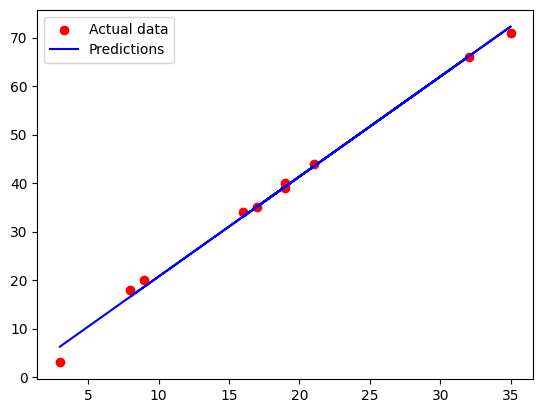

In [16]:
predictions = Xb @ theta

plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X, predictions, 'b', label='Predictions')
plt.legend()